## Statistical analysis of differnt assignment strategies

In [10]:
import math
import numpy as np
from random import randint
from random import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

ModuleNotFoundError: No module named 'seaborn'

In [2]:
def calc_distance(pos1, pos2):
    """
    Calculate euclidean distance between two positions
    """
    return round(math.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2), 5)

In [6]:
def calc_no_assignment(arr): 
    """
    Calculate way with no assignment 
    Both passengers might choose to same passenger 
    The slower makes useless steps towards passenger which is picked 
    up by the other agent
    """
    a_1 = calc_distance((arr[0],arr[1]),(arr[4],arr[5]))
    b_1 = calc_distance((arr[2],arr[3]),(arr[4],arr[5]))

    a_2 = calc_distance((arr[0],arr[1]),(arr[6],arr[7]))
    b_2 = calc_distance((arr[2],arr[3]),(arr[6],arr[7]))

    if (a_1 < a_2) and (b_1 < b_2): 
        # conflicting passengers
        if a_1 < b_1: 
            return 2*a_1 + b_2  
        else: 
            return 2*b_1 + a_2
    elif (a_2 < a_1) and (b_2 < b_1): 
        # conflicting passengers
        if a_2 < b_2: 
            return 2*a_2 + b_1  
        else: 
            return 2*b_2 + a_1
    else: 
        return min(a_1,a_2) + min(b_1,b_2)

def egoistic_assignment(arr): 
    """
    First agent assigns nearest passenger to himself
    """
    a_1 = calc_distance((arr[0],arr[1]),(arr[4],arr[5]))
    b_1 = calc_distance((arr[2],arr[3]),(arr[4],arr[5]))

    return 0 if a_1 < b_1 else 1

def calc_minimal_way(arr): 
    
    a_1 = calc_distance((arr[0],arr[1]),(arr[4],arr[5]))
    b_1 = calc_distance((arr[2],arr[3]),(arr[4],arr[5]))

    a_2 = calc_distance((arr[0],arr[1]),(arr[6],arr[7]))
    b_2 = calc_distance((arr[2],arr[3]),(arr[6],arr[7]))

    return 0 if (a_1 + b_2) < (a_2 + b_1) else 1

def calc_way_with_assignment(arr, assign): 
    if assign == 0: 
        a_1 = calc_distance((arr[0],arr[1]),(arr[4],arr[5]))
        b_2 = calc_distance((arr[2],arr[3]),(arr[6],arr[7]))
        return a_1 + b_2 
    else: 
        a_2 = calc_distance((arr[0],arr[1]),(arr[6],arr[7]))
        b_1 = calc_distance((arr[2],arr[3]),(arr[4],arr[5]))
        return a_2 + b_1

In [7]:
n_samples = 1000000

X = np.array([[random() for _ in range(8)] for _ in range(n_samples)])

optimal = 0
rand = 0
egoistic = 0
no_assignment = 0

for state in X: 
    optimal += calc_way_with_assignment(state, calc_minimal_way(state))
    rand += calc_way_with_assignment(state, randint(0,1))
    egoistic += calc_way_with_assignment(state, egoistic_assignment(state))
    no_assignment += calc_no_assignment(state)

In [5]:
print(f'Optimal: {optimal/optimal}')
print(f'Random: {round(rand/optimal,3)}')
print(f'Egoistic: {round(egoistic/optimal,3)}')
print(f'No assignment: {round(no_assignment/optimal,3)}')

Optimal: 1.0
Random: 1.181
Egoistic: 1.054
No assignment: 1.213


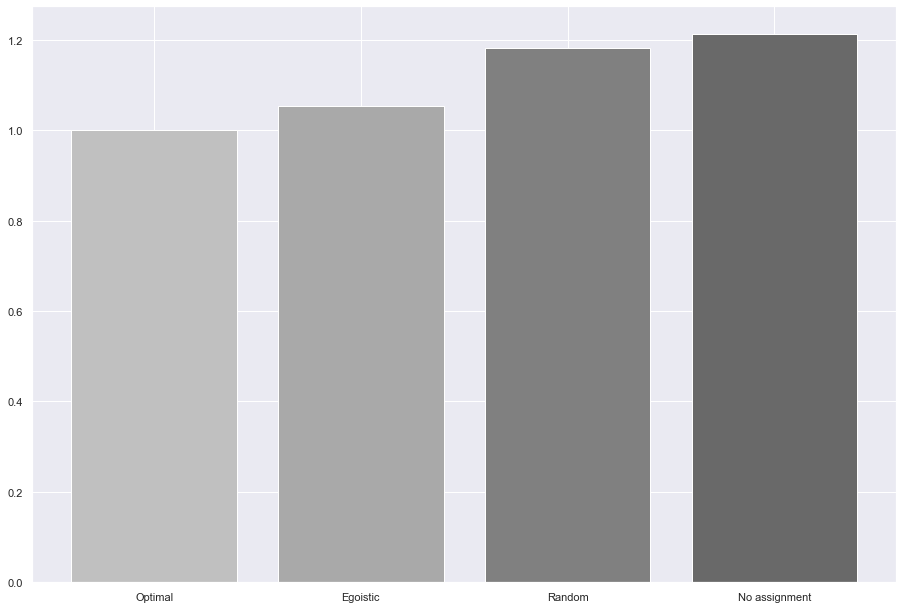

In [26]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
modes = ['Optimal', 'Egoistic', 'Random', 'No assignment']
results = [optimal/optimal,egoistic/optimal,rand/optimal,no_assignment/optimal]
colors=['silver', 'darkgrey', 'gray', 'dimgray']
ax.bar(modes,results,color=colors)
plt.savefig("way.jpg", dpi=1200, bbox_inches='tight')
plt.show()